In [1]:
import os
os.environ["PYTHON_PYSPARK"] = "python"

making pyspark session 

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PySpark Analysis of Flying Etiquette Survey Data").getOrCreate()

load the dataset


In [3]:
spark_data = spark.read.csv('flying_1671498679775.csv', header=True, inferSchema=True)
spark_data.show(5)

+------+-----+-----------------+-------------------+--------------------+-------------------+------------------+------------+-----------------+--------------------+-------------------+----------------+------------+--------+------------+--------------------+--------------------+--------------------+-----------+-------------+-----------+
|gender|  age|children_under_18|   household_income|           frequency|  recline_frequency|recline_obligation|recline_rude|recline_eliminate|switch_seats_friends|switch_seats_family|wake_up_bathroom|wake_up_walk|    baby|unruly_child|       two_arm_rests|     middle_arm_rest|               shade|unsold_seat|talk_stranger|     get_up|
+------+-----+-----------------+-------------------+--------------------+-------------------+------------------+------------+-----------------+--------------------+-------------------+----------------+------------+--------+------------+--------------------+--------------------+--------------------+-----------+-------------

In [40]:
print("counting the rows: ", spark_data.count())
print("checking the column: ", len(spark_data.columns))

counting the rows:  1007
checking the column:  21


In [26]:
from pyspark.sql.functions import col
freq_counts = spark_data.groupBy("frequency")\
  .count()\
    .orderBy(col("count").desc())

freq_counts.show()


+--------------------+-----+
|           frequency|count|
+--------------------+-----+
| Once a year or less|  611|
|Once a month or less|  198|
|               Never|  164|
|A few times per m...|   29|
|           Every day|    3|
|A few times per week|    2|
+--------------------+-----+



converting to pandas dataframe

In [31]:
pdf= freq_counts.toPandas()
pdf.head(5)


,frequency,count
0,Once a year or less,611
1,Once a month or less,198
2,Never,164
3,A few times per month,29
4,Every day,3


plotting the Frequency of Air Travel

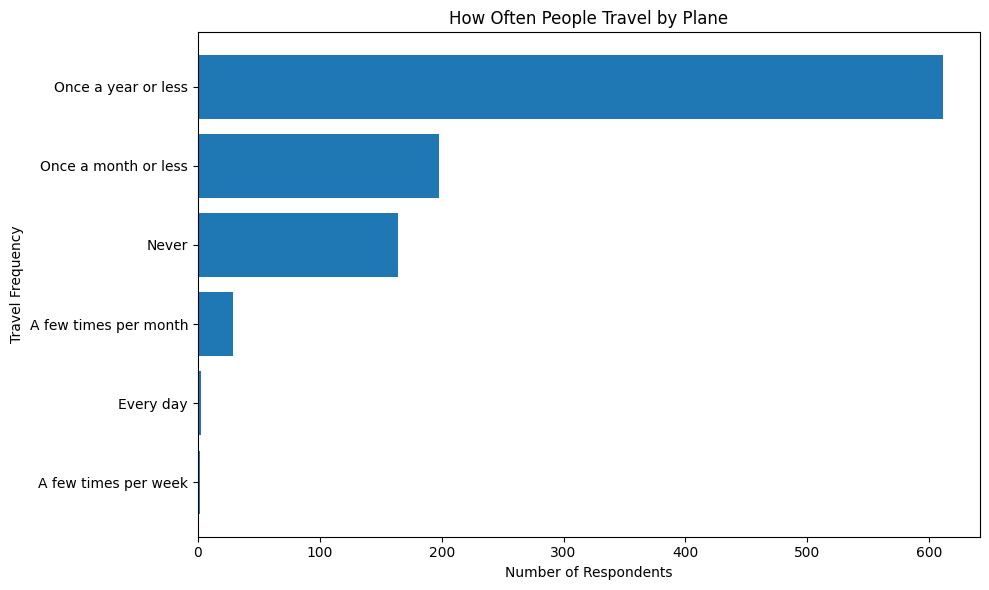

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.barh(pdf["frequency"], pdf["count"])

plt.xlabel("Number of Respondents")
plt.ylabel("Travel Frequency")
plt.title("How Often People Travel by Plane")

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


Part b) Children and Attitudes Toward Babies on Planes

In [34]:
columns_to_check = [
    "gender", "age", "children_under_18", "household_income", "frequency", 
    "recline_frequency", "recline_obligation", "recline_rude", "recline_eliminate",
    "switch_seats_friends", "switch_seats_family", "wake_up_bathroom", "wake_up_walk", 
    "baby", "unruly_child", "two_arm_rests", "middle_arm_rest", "shade", 
    "unsold_seat", "talk_stranger", "get_up"
]


from pyspark.sql.functions import col, sum as sum

# Create a dictionary of null counts
null_counts = spark_data.select([sum(col(c).isNull().cast("int")).alias(c) for c in columns_to_check])

null_counts.show()



+------+---+-----------------+----------------+---------+-----------------+------------------+------------+-----------------+--------------------+-------------------+----------------+------------+----+------------+-------------+---------------+-----+-----------+-------------+------+
|gender|age|children_under_18|household_income|frequency|recline_frequency|recline_obligation|recline_rude|recline_eliminate|switch_seats_friends|switch_seats_family|wake_up_bathroom|wake_up_walk|baby|unruly_child|two_arm_rests|middle_arm_rest|shade|unsold_seat|talk_stranger|get_up|
+------+---+-----------------+----------------+---------+-----------------+------------------+------------+-----------------+--------------------+-------------------+----------------+------------+----+------------+-------------+---------------+-----+-----------+-------------+------+
|     0|  0|                0|               0|        0|                0|                 0|           0|                0|                   0|  